In [1]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import pylab as pl
from astropy import visualization, coordinates, units as u
from astroquery.vizier import Vizier
from photutils import DAOStarFinder
from astropy.wcs.utils import fit_wcs_from_points
import glob
import os
from astropy.coordinates import SkyCoord, frame_transform_graph
from astropy.wcs.utils import (celestial_frame_to_wcs, pixel_to_skycoord, proj_plane_pixel_scales,
                               skycoord_to_pixel, wcs_to_celestial_frame)

#from ..utils import parse_input_data
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
from wcsFunction import findwcs

In [2]:
cd /orange/adamginsburg/w51/gtc/parker/wcsCorrectedImagesTest

/orange/adamginsburg/w51/gtc/parker/wcsCorrectedImagesTest


In [3]:
files = !ls *fits
len(files)

2

In [4]:
path = '/orange/adamginsburg/w51/gtc/parker/wcsCorrectedImagesTest/reprojected'

In [6]:
wcs, shape = find_optimal_celestial_wcs(files)

In [7]:
for filename in files:
    
    filehandle = fits.open(filename)
    filename_nosuffix = os.path.splitext(filename)[0]
    new_filename = f'{path}/{filename_nosuffix}_reprojected.fits'
    
    array, footprint = reproject_interp(filename, wcs, shape)
    
    header = filehandle[0].header
    header.update(wcs.to_header())
    
    fits.writeto(f'{new_filename}', array, header, overwrite=True)

In [8]:
cd /orange/adamginsburg/w51/gtc/parker/wcsCorrectedImagesTest/reprojected

/orange/adamginsburg/w51/gtc/parker/wcsCorrectedImagesTest/reprojected


In [9]:
repro_files = !ls *fits

In [10]:
file1 = fits.open(repro_files[0])
file2 = fits.open(repro_files[1])

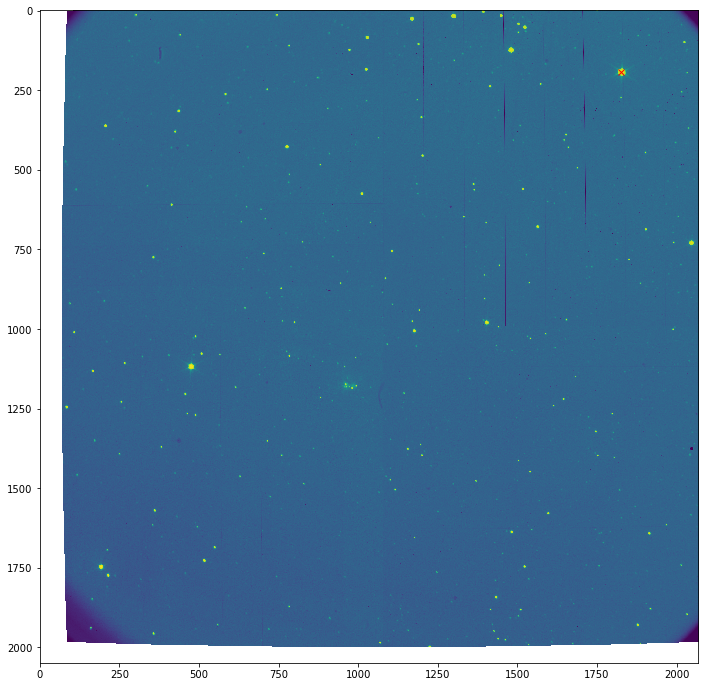

In [22]:
pl.figure(figsize=(12,12))
pl.imshow(file1[0].data)
pl.plot(1825,192, 'rx')

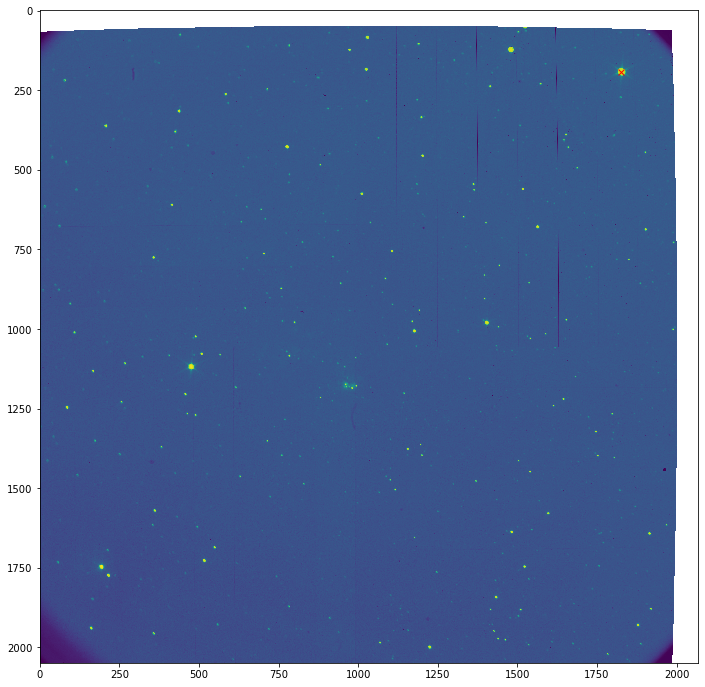

In [23]:
pl.figure(figsize=(12,12))
pl.imshow(file2[0].data)
pl.plot(1825,192, 'rx')